In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [17]:
train_dataset = datasets.MNIST(root ='./Data1', train = True, transform = transforms.ToTensor(), download = False)

In [18]:
test_dataset = datasets.MNIST(root ='./Data', train = False, transform = transforms.ToTensor(), download = True)

In [19]:
len(train_dataset)

60000

In [20]:
type(train_dataset)

torchvision.datasets.mnist.MNIST

In [21]:
len(test_dataset)

10000

In [22]:
image, label =train_dataset[0]

In [23]:
image.shape

torch.Size([1, 28, 28])

In [24]:
label

5

In [25]:
# to compute mean and std of the images for normalization
loader = DataLoader(dataset = train_dataset, batch_size = 60000, shuffle = True)

In [26]:
loader = DataLoader(train_dataset, 60000, True)

In [27]:
sample = train_dataset[0]

In [28]:
type(sample)

tuple

In [29]:
len(sample)

2

In [30]:
sample[0].shape

torch.Size([1, 28, 28])

In [31]:
sample[1]

5

In [32]:
for images, labels in loader:
    mean_train = images.mean()
    std_train = images.std()
    

In [33]:
mean_train


tensor(0.1307)

In [34]:
mean_train = 0.1307

In [35]:
std_train


tensor(0.3081)

In [36]:
std_train = 0.3081

In [37]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean_train,),(std_train,))])

In [38]:
train_dataset = datasets.MNIST(root ='./data',train = True, transform = transform, download = False)

In [39]:
test_dataset = datasets.MNIST(root ='./data', train = False, transform = transform, download = False )

In [40]:
# Visualize the datasets

In [41]:
len(train_dataset)

60000

In [42]:
img_sample = train_dataset[20]

In [43]:
len(img_sample)

2

In [44]:
type(img_sample)

tuple

In [45]:
img_sample[0].shape

torch.Size([1, 28, 28])

In [46]:
img_sample[1]

4

In [47]:
img_numpy = img_sample[0].numpy()

In [48]:
img = img_numpy

In [52]:
import matplotlib.pyplot as plt

In [53]:
img.shape

(1, 28, 28)

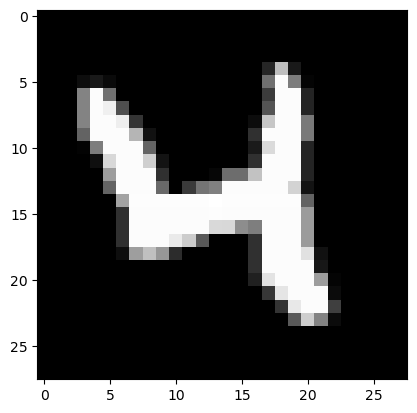

In [54]:
plt.imshow(img.reshape(28,28), cmap ='gray')

In [55]:
print(img_sample[1])

4


In [56]:
# Convert to batch
train_load = DataLoader(dataset = train_dataset, batch_size = 100, shuffle = True)


In [57]:
test_load = DataLoader(dataset = test_dataset, batch_size = 100, shuffle = True)

In [58]:
len(train_load)

600

In [103]:
# Building the CNN
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn1 = nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size =3, stride =1, padding =1)
        self.batchnorm1 = nn.BatchNorm2d(8)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size =2)
        self.cnn2 = nn.Conv2d(in_channels = 8, out_channels =32, kernel_size =5, stride = 1,padding =2)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(1568,600)
        self.dropout = nn.Dropout(p=0.1)
        self.fc2 = nn.Linear(600,10)
    def forward(self,x):
        out = self.cnn1(x)
        out = self.batchnorm1(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.cnn2(out)
        out = self.batchnorm2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = out.view(-1, 1568)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out
        
        
        
        

In [104]:
model = CNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [105]:
for x,y in train_load:
    print(x.shape)
    print(y.shape)
    break

torch.Size([100, 1, 28, 28])
torch.Size([100])


In [121]:
for i, (inputs,labels) in enumerate(train_load):
        output = model(inputs)
        loss_iter  = loss_fn(output,labels)
        optimizer.zero_grad()
        loss_iter.backward()
        optimizer.step()   # w(t+1) = wt - lr*grad
        total_loss += loss_iter.item()
        _,predicted = torch.max(output,1)  # [0.1,0.7,0.2]
        break
print(output)


tensor([[-9.4408e+00,  2.6106e+00,  4.1690e-02,  4.0170e-01, -1.9384e+00,
         -5.3775e+00, -1.4185e+01,  1.4709e+01,  5.6693e-01,  3.2425e+00],
        [ 1.6408e+01, -5.7496e+00,  3.0072e+00, -6.6900e+00, -8.7720e+00,
          1.1932e+00,  2.4951e+00,  2.0079e-01,  4.1380e+00,  3.0585e+00],
        [-3.0490e+00,  4.9403e+00, -2.8209e-01, -4.3785e+00,  1.8547e+01,
         -3.7661e+00,  1.6858e+00,  1.8643e+00,  2.4221e+00,  5.0460e+00],
        [ 7.9956e+00, -5.5570e+00, -2.5720e+00, -5.3045e+00,  1.4941e+00,
          9.2334e+00,  1.6167e+01, -5.2521e+00,  7.4766e+00,  3.9347e-01],
        [-1.2864e+00, -8.5754e+00, -3.2492e+00,  6.6281e-01,  2.7490e+00,
         -1.7193e+00, -9.1724e+00,  1.2682e+00,  5.6393e+00,  1.8734e+01],
        [ 4.3038e+00,  4.4383e+00,  4.3498e+00, -4.0228e+00,  7.8037e+00,
          3.2587e-01,  8.4658e+00, -3.3141e+00,  3.1461e+00, -2.7786e+00],
        [ 6.6503e+00, -5.2052e+00, -1.6419e+00, -2.9371e+00,  4.0027e+00,
          8.9879e+00,  1.8791e+0

In [107]:
train_loss = []
train_acc = []
num_epochs = 2

for epoch in range(num_epochs):
    iterations = 0
    total_correct = 0
    total_loss = 0
    model.train()  # model.eval()
    for i, (inputs,labels) in enumerate(train_load):
        output = model(inputs)
        loss_iter  = loss_fn(output,labels)
        optimizer.zero_grad()
        loss_iter.backward()
        optimizer.step()   # w(t+1) = wt - lr*grad
        total_loss += loss_iter.item()
        _,predicted = torch.max(output,1)  # [0.1,0.7,0.2]
        total_correct += (predicted == labels).sum()
        iterations +=1  # 60000 images , in 100 batch size : no of batches: 60000/100 = 600 batches
    avg_loss = total_loss/(iterations)
    avg_acc  = 100*(total_correct/len(train_dataset))
    train_loss.append(avg_loss)
    train_acc.append(avg_acc)
    print("Epochs : {}/{}, Training_loss: {:.3f}, Training_Acc: {:.3f}" .format(epoch+1,num_epochs,avg_loss,avg_acc))
        

Epochs : 1/2, Training_loss: 0.411, Training_Acc: 91.105
Epochs : 2/2, Training_loss: 0.070, Training_Acc: 97.898


In [109]:
model.eval()  # model.eval()
iterations = 0
total_correct = 0
total_loss = 0
for i, (inputs,labels) in enumerate(test_load):
        output = model(inputs)
        loss_iter  = loss_fn(output,labels)
        total_loss += loss_iter.item()
        _,predicted = torch.max(output,1)  # [0.1,0.7,0.2]
        total_correct += (predicted == labels).sum()
        iterations +=1  # 10000 images , in 100 batch size : no of batches: 60000/100 = 600 batches
avg_loss = total_loss/(iterations)
avg_acc  = 100*(total_correct/len(test_dataset))
print("Test_Accuracy",avg_acc.item())
print("Test_loss", avg_loss)

Test_Accuracy tensor(97.6800)
Test_loss 0.0722176612354815


In [110]:
print("Test_Accuracy",avg_acc.item())
print("Test_loss", avg_loss)

Test_Accuracy 97.68000030517578
Test_loss 0.0722176612354815


In [112]:
image = test_dataset[20]

In [116]:
img = image[0]

In [118]:
img.shape

torch.Size([1, 28, 28])

In [126]:
img = img.view((1,1,28,28))

In [127]:
label = image[1]

In [128]:
label

9

In [130]:
model.eval()
output = model(img)
x,predicted = torch.max(output,1)
print("predicted label is", predicted.item())
print("Original label is" , label)



predicted label is 9
Original label is 9


In [136]:
import cv2
from PIL import Image

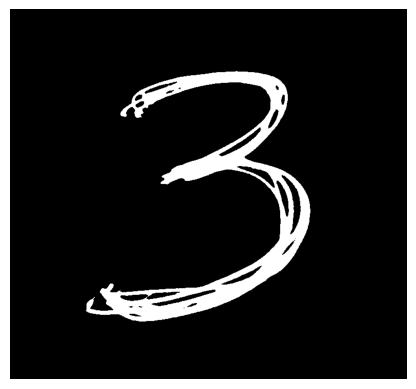

In [145]:
image = cv2.imread("3.jpg",0)
ret,threshold = cv2.threshold(image,100,255,cv2.THRESH_BINARY_INV) 
plt.imshow(threshold,cmap ="gray")
plt.axis("off")
plt.show()


In [146]:
transforms_photo = transforms.Compose([transforms.Resize([28,28]),transforms.ToTensor(),transforms.Normalize(mean_train,std_train)])

In [147]:
# to convert numpy array to PIL image
image = Image.fromarray(threshold)

In [149]:
img = transforms_photo(image)

In [151]:
img = img.view(1,1,28,28)
model.eval()
output = model(img)
x,predicted = torch.max(output,1)
print("The predicted label is ", predicted.item())


The predicted label is  3
